# Modelo de un termistor
En esta hoja de ejercicios, calcularás el modelo de un termistor en base 3 mediciones reales de valores conocidos. Específicamente:

1. Convertiras entre unidades de temperaturas
2. Definirás el sistema de ecuaciones usando tres mediciones
3. Resolverás dicho sistema utilizando la librería de numpy para encontrar las constantes del termistor.
4. Visualizarás la curva de calibración de tu termistor usando matplotlib

### 1. Conversión de temperatura
Completa los métodos para transformar grados celsius a kelvin y viceversa

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [56]:
# Conversion de temperatura
def k_to_c(k):
    '''
        Regresa la temperatura en grados celcius para un valor de entrada en grados kelvin.
        args:
            - k (float): Temperatura en grados kelvin
        returns:
            - c (float): Temperatura en grados celsius
    '''
    # TODO: Regresa la temperatura en grados celsius
    c = k - 273.15

    return c

def c_to_k(c):
    '''
        Regresa la temperatura en grados kelvin para un valor de entrada en grados celsius.
        args:
            - c (float): Temperatura en grados kelvin
        returns:
            - k (float): Temperatura en grados celsius
    '''
    # TODO: Regresa la temperatura en grados kelvin
    k = c + 273.15

    return k

### 2. Modelado del sistema

En clase se les pidio medir la resistencia del termistor para 3 valores conocidos de temperatura. En la sección de la siguiente celda, escribe la resistencia del termistor para los tres valores de temperatura que hayas elegido. Puedes ver un ejemplo de como definir las ecuaciones debajo

In [57]:
# Definimos nuestros valores conocidos como (Temperatura en K, resistencia en Ohm)
# Por ejemplo, si el termistor midió 16000 Ohms a 0 grados celsius, escribirias:
# eq1 = [c_to_k(0), 16000]

# TODO: Indica los valores de resistencia y temperatura que hasya medido
eq1 = [c_to_k(0), 30000]
eq2 = [c_to_k(30), 8450]
eq3 = [c_to_k(100), 2830]

### 3. Constantes del termistor
Como vimos en clase, podemos modelar el funcionamiento de un termistor utilizando la ecuación:

$\frac{1}{T} = A + B \ln(R) + C(\ln R)^3$

Y para encontrar las constantes necesitamos definir y resolver un sistema de ecuaciones utilizando tres pares de valores conocidos para $T$ y $R$. Por lo anteior utilizaremos mediciones que has hecho

En la siguiente celda, define una matriz de numpy de la forma:

$X  = \left[  \begin{matrix} 
                1 & \ln(R_1) & \ln(R_1)^3\\
                1 & \ln(R_2) & \ln(R_2)^3\\
                1 & \ln(R_3) & \ln(R_3)^3\\
                \end{matrix} \right]
    =\left[  \begin{matrix} 
                1 & \ln(eq1[1]) & \ln(eq1[1])^3\\
                1 & \ln(eq2[1]) & \ln(eq2[1])^3\\
                1 & \ln(eq3[1]) & \ln(eq3[1])^3\\
                \end{matrix} \right]$

Donde las soluciones están dadas por

$b  = \left[  \begin{matrix} 
                \frac{1}{T_1} \\
                \frac{1}{T_2} \\
                \frac{1}{T_3} \\
                \end{matrix}\right]
    =\left[  \begin{matrix} 
                \frac{1}{eq1[0]} \\
                \frac{1}{eq2[0]} \\
                \frac{1}{eq3[0]} \\
                \end{matrix}\right]$

Recuerda que, como visto en clase, la temperatura de la ecuación del tersmistor debe estar en grados kelvin. Por lo tanto, asegúrate de que los valores que ingreses como solución se encuentren en esta unidad de medición.

Finalmente, utiliza la función de numpy `np.linalg.solve(X,b)` para resolver el sistema de ecuaciones y encontrar las constantes del termistor A, B, C

In [58]:
def solve(eq1, eq2, eq3):
    '''
        Calcula las constantes del termistor dados tres pares de (resistencia, temperatura) conocidos.
        args:
            - eq1(list): Contiene el valor de los grados en kelvin y el valor de la resistencia en ohms (eq1=[gradK, Ohms])
            - eq2(list): Contiene el valor de los grados en kelvin y el valor de la resistencia en ohms (eq1=[gradK, Ohms])
            - eq3(list): Contiene el valor de los grados en kelvin y el valor de la resistencia en ohms (eq1=[gradK, Ohms])
        returns:
            - constants(list): constantes del modelo del termistor constants=[a,b,c]
    '''
    # TODO: Define la matriz del sistema de ecuaciones a resolver X
    unknown = np.array([[1, (np.log(eq1[1])), ((np.log(eq1[1]))**3)],
                       [1, (np.log(eq2[1])), ((np.log(eq2[1]))**3)],
                        [1, (np.log(eq3[1])), ((np.log(eq3[1]))**3)]])
    # TODO: Define el vector de soluciones b
    solutions = np.array([[1/(eq1[0])],
                         [1/(eq2[0])],
                         [1/(eq3[0])]])
    # TODO: Resuelve el sistema de ecuaciones y regresa las constantes
    return np.linalg.solve(unknown,solutions)

## 4. Curva de calibración
Ahora que puedes calcular las constantes del termistor, utiliza la función anterior para modelar tu sensor usando la ecuación:

$\frac{1}{T} = A + B \ln(R) + C(\ln R)^3$

Finalmente, grafíca tu función para diferentes valores de resistencia y analiza como se relaciona a lo visto en clase.

In [59]:
# Definir nuestro modelo en funcion de la resistencia y las constantes
def modelo(resistance, a,b,c):
    '''
        Dada la resistencia del termistor y las constantes, calcula la temperatura en grados celsius que mide el sensor.
        args:
            - resistance (float): Resistencia en ohms
            - a,b,c (float): constantes de la ecuación del termistor
        returns:
            - celsius (float): temperatura en grados celsius que mide el termistor
    '''
    # TODO: implementa la ecuación del termistor usando las constantes dadas
    # y calcula el valor de la temperatura en celsius
    # Recuerda que la ecuación del termistor considera la temperatura en grados Kelvin
    # Puedes utilizar la función anteriormente definida
    # para convertir grados kelvin a celsius k_to_c(gradK)
    T = 1/(a + b*np.log(resistance) + c*mt.pow(np.log(resistance),3))
    celsius = k_to_c(T)
    return celsius

Una vez definidas todas funciones, podemos visualizar la curva de calibración del sensor. La siguiente celda llama al método que anteriormente definiste para resolver el sistema de ecuaciones y calcula la temperatura para tres valores de resistencia desconocidos. 

Esto nos sirve para ver como podríamos predecir temperaturas nuevas usando nuestro sensor.

In [60]:
# Buscamos la solucion e imprimimos las constantes
a,b,c = solve(eq1, eq2, eq3)
print("Constantes:", a,b,c)

# Probamos el modelo para valores conocidos
res_values = [4000, 6000, 1000, 5000]
for x in res_values:
    print("Temp para %d Ohms ->" % x, modelo(x,a,b,c))

Constantes: [-0.00711616] [0.00150672] [-4.34063392e-06]
Temp para 4000 Ohms -> [71.19919984]
Temp para 6000 Ohms -> [45.96248993]
Temp para 1000 Ohms -> [264.16361901]
Temp para 5000 Ohms -> [56.34730511]


Finalmente, visualiza la curva de calibración llamando a tu método para obtener la temperatura correspondiente a diferentes valores de resistencia y graficando los datos usando matplotlib

C:\Users\israe\AppData\Local\Temp\ipykernel_10264\2995751975.py:16: RuntimeWarning: divide by zero encountered in log
  T = 1/(a + b*np.log(resistance) + c*mt.pow(np.log(resistance),3))
C:\Users\israe\AppData\Local\Temp\ipykernel_10264\2995751975.py:16: RuntimeWarning: invalid value encountered in add
  T = 1/(a + b*np.log(resistance) + c*mt.pow(np.log(resistance),3))


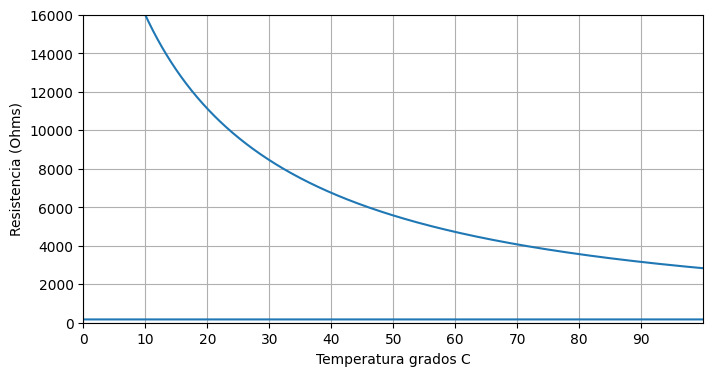

In [61]:
# Visualizamos el modelo para multiples valores
fig, ax = plt.subplots(1,1, figsize=(8,4))

# calcular valores
res_values = np.linspace(0, 16000, 1000)
temp = [modelo(res,a,b,c) for res in res_values]


# Graficar
x_ticks = np.arange(0, 100, step=10)
ax.set_xticks(x_ticks)

# TODO: Grafica la temperatura en el eje de las x y los valores de resistencia en el eje de las y
# =========== Start solution ============
ax.plot(temp,res_values)
# =========== End solution ==============
ax.set_xlabel("Temperatura grados C")
ax.set_ylabel("Resistencia (Ohms)")
ax.grid()
plt.xlim([0, 100])
plt.ylim([0, 16000])
plt.show()